In [1]:
# Import our relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Breast_cancer_wisconsin_diagnosis.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Drop the id column
data = data.drop('id', axis=1)
data = data.drop('Unnamed: 32', axis=1)
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [5]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (398, 30)
X_test.shape: (171, 30)
y_train.shape: (398,)
y_test.shape: (171,)


# VISUALISING PCA AND TSNE PLOTS¶
Let's get to the meat of this notebook which is to produce high-level PCA and TSNE visuals

In [6]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [7]:
# Turn dataframe into arrays
X_train = X_train.values
X_test = X_test.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
train_pca_2d = pca.fit_transform(X_train)
test_pca_2d = pca.fit_transform(X_test)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
train_tsne_results = tsne.fit_transform(X_train)
test_tsne_results = tsne.fit_transform(X_test)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 398 samples in 0.001s...
[t-SNE] Computed neighbors for 398 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 398 / 398
[t-SNE] Mean sigma: 17.977994
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.973656
[t-SNE] KL divergence after 1800 iterations: 0.173023
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 171 samples in 0.000s...
[t-SNE] Computed neighbors for 171 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 171 / 171
[t-SNE] Mean sigma: 11.093358
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.035530
[t-SNE] KL divergence after 900 iterations: 0.130900


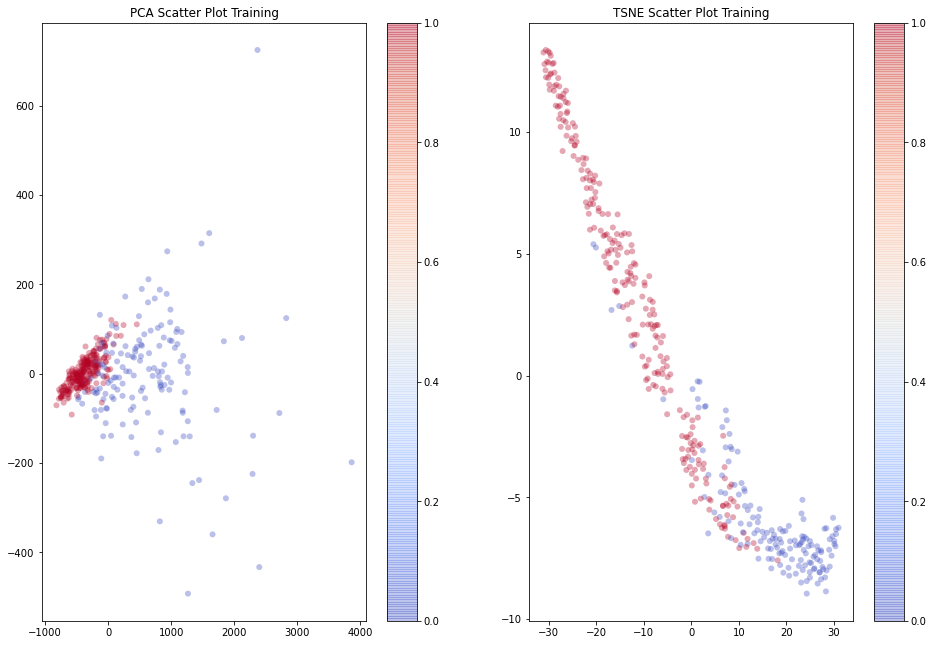

In [8]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(train_pca_2d[:,0],train_pca_2d[:,1], c = y_train, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot Training')
plt.subplot(122)
plt.scatter(train_tsne_results[:,0],train_tsne_results[:,1],  c = y_train, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot Training')
plt.show()

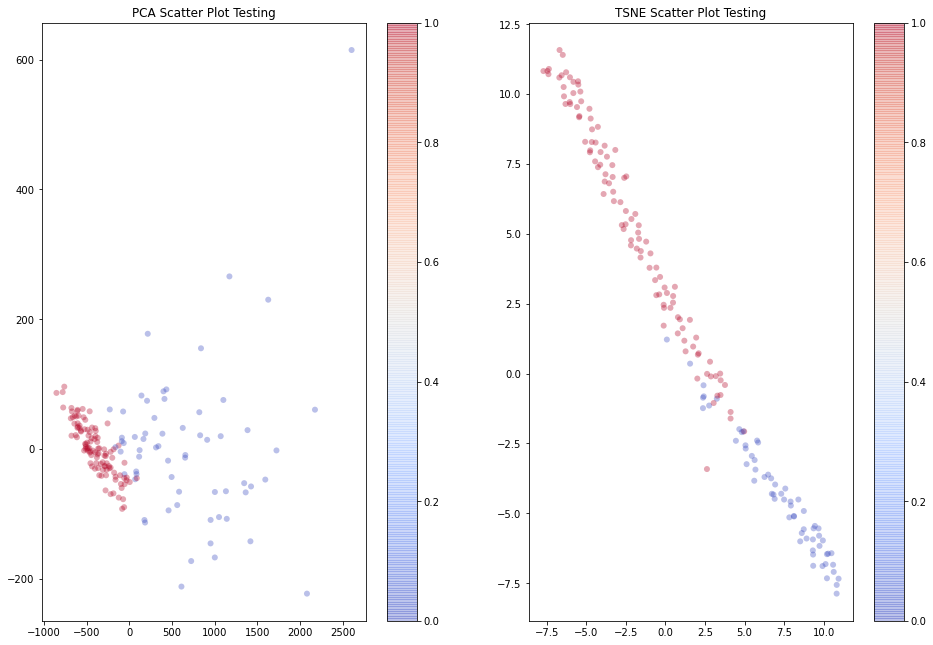

In [9]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(test_pca_2d[:,0],test_pca_2d[:,1], c = y_test, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot Testing')
plt.subplot(122)
plt.scatter(test_tsne_results[:,0],test_tsne_results[:,1],  c = y_test, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot Testing')
plt.show()

As one can see from these high-level plots, even though PCA does quite a decent job of visualising our two target clusters ( M for Malignant and B for Benign - cheating a bit here with the labels), the visuals in TSNE is much more obvious in terms of the demarcation in the target.

# STANDARDISATION AND VISUALISATION
Let's now try scaling (or standardising) our features and see if we can get even more obvious/intuitive clusters in our plots.

In [10]:
# Calling Sklearn scaling method
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [11]:
# Invoke the PCA method on the standardised data
pca = PCA(n_components=2)
train_pca_2d_std = pca.fit_transform(X_train_std)
test_pca_2d_std = pca.fit_transform(X_test_std)
# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
train_tsne_results_std = tsne.fit_transform(X_train_std)
test_tsne_results_std = tsne.fit_transform(X_test_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 398 samples in 0.001s...
[t-SNE] Computed neighbors for 398 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 398 / 398
[t-SNE] Mean sigma: 1.678350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.064606
[t-SNE] KL divergence after 900 iterations: 0.727239
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 171 samples in 0.000s...
[t-SNE] Computed neighbors for 171 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 171 / 171
[t-SNE] Mean sigma: 2.245331
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.437195
[t-SNE] KL divergence after 1000 iterations: 0.436906


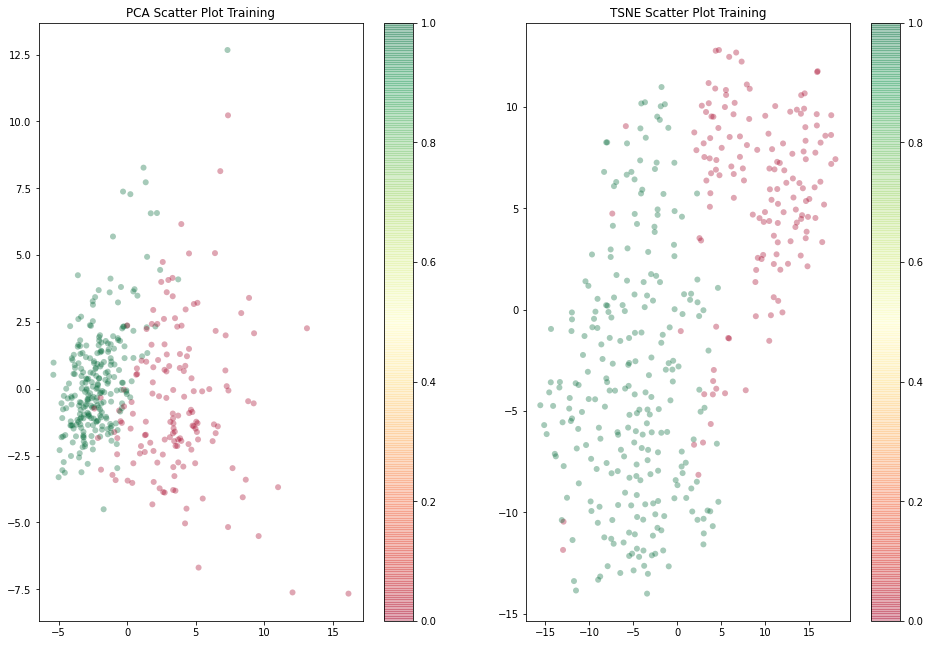

In [12]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(train_pca_2d_std[:,0],train_pca_2d_std[:,1], c = y_train, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot Training')
plt.subplot(122)
plt.scatter(train_tsne_results_std[:,0],train_tsne_results_std[:,1],  c = y_train, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot Training')
plt.show()

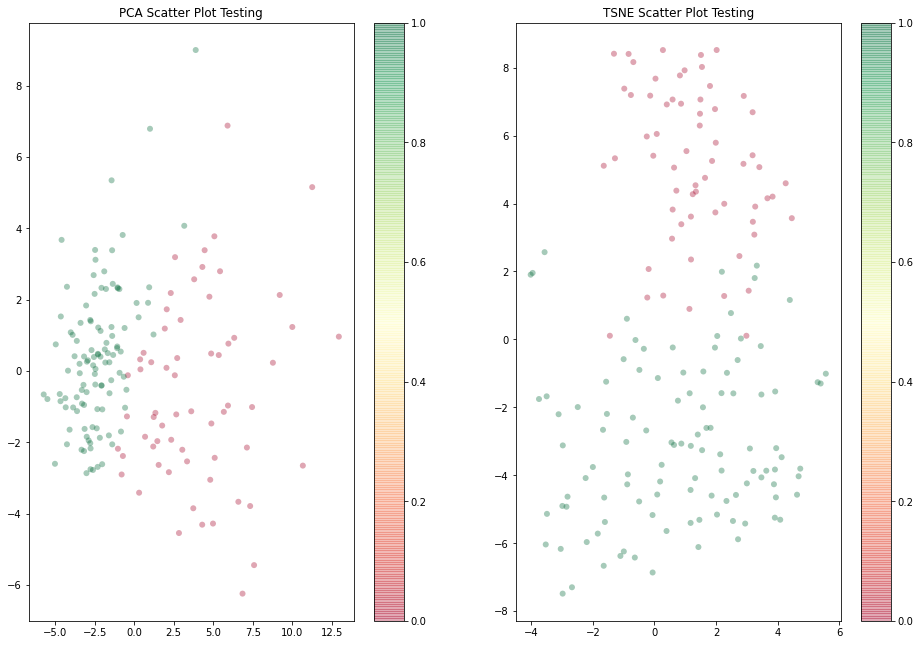

In [13]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(test_pca_2d_std[:,0],test_pca_2d_std[:,1], c = y_test, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot Testing')
plt.subplot(122)
plt.scatter(test_tsne_results_std[:,0],test_tsne_results_std[:,1],  c = y_test, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot Testing')
plt.show()

In [14]:
X_train = train_tsne_results_std
X_test = test_tsne_results_std

# Normalisation

In [15]:
X_train = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_test))/(np.max(X_test) - np.min(X_test))

# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



The Confusion Matrix for our TSNE Logistic Regression is:

[[56  7]
 [20 88]]


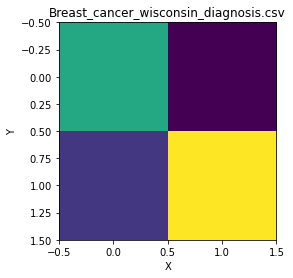

In [17]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
print('\n\nThe Confusion Matrix for our TSNE Logistic Regression is:\n')
print(conf_matrix)
 
plt.imshow(conf_matrix)
plt.title('Breast_cancer_wisconsin_diagnosis.csv')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


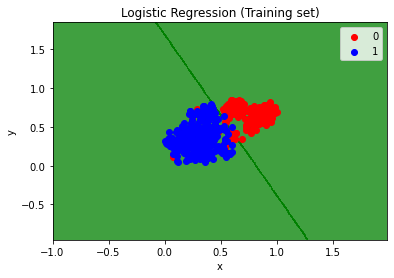

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


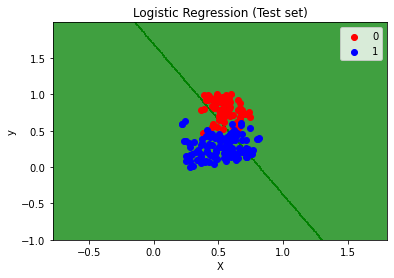




 Hence the accuracy of the t-sne for Logistic Regression is: 0.8421052631578947


 Done :)


In [19]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('\n\n\n Hence the accuracy of the t-sne for Logistic Regression is:',accuracy)
print('\n\n Done :)')